<a href="https://colab.research.google.com/github/joe94113/Deep-Learning-course/blob/main/%E5%A4%9A%E5%B1%A4%E6%84%9F%E7%9F%A5%E5%99%A8mlp_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets.mnist import load_data
# ((訓練圖片, 訓練圖片答案),(測試圖片, 測試圖片答案))
(x_train, y_train), (x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("訓練資料維度", x_train.shape)
print("測試資料維度", x_test.shape)

訓練資料維度 (60000, 28, 28)
測試資料維度 (10000, 28, 28)


正確答案: 1


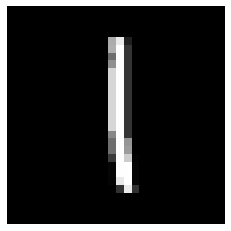

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print("正確答案:", y_train[c])
plt.axis("off") # 不顯示X, Y軸
plt.imshow(x_train[c], cmap="gray")

In [ ]:
# Step 1.1處理圖片 (reshape-> / 255) 變成一維
x_train_shape = x_train.reshape(60000, 784) / 255 # 改變陣列形狀的函式 reshape()
x_test_shape = x_test.reshape(10000, 784) / 255
x_train_shape[0]

In [ ]:
# Step 1.2處理答案 One-Hot Encoding
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("處理前:", y_train[0])
print("處理後:", y_train_cat[0])

處理前: 5
處理後: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


輸出層如果只有一個函數，可以選用sigmoid函數

輸出層，如果有兩個以上輸出神經，請選用softmax函數

如果是中間層，只有一種選擇relu函數，原因是避免梯度消失，

In [ ]:
# 建立模型
from keras.models import Sequential # 序貫模型
from keras.layers import Dense # 一層一層
model = Sequential()
# 中間層:relu
# 最後一層:
# 一個神經元:sigmoid
# 兩個以上:softmax
model.add(Dense(128, activation="relu", input_dim=784)) # 128根神經元，使用relu激活函數，第一層784個要帶入，因為她不知道
model.add(Dense(10, activation="softmax"))
model.summary() # 模型摘要

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


輸出一個神經元選擇:binary_crossentropy，多個神經元選擇categorical_crossentropy

In [ ]:
# 確定模型
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # 選擇adam優化器，metrics其他衡量標準

In [ ]:
# 訓練模型
model.fit(x_train_shape, 
        y_train_cat, 
        batch_size=200, 
        epochs=15, 
        validation_split=0.1,
        verbose=2) # 看100~200筆資料做一次梯度下降，完整訓練10次找到平滑的地方最棒，把10%當作考試材料

Epoch 1/15
270/270 - 2s - loss: 0.0220 - accuracy: 0.9945 - val_loss: 0.0737 - val_accuracy: 0.9797
Epoch 2/15
270/270 - 1s - loss: 0.0186 - accuracy: 0.9956 - val_loss: 0.0731 - val_accuracy: 0.9805
Epoch 3/15
270/270 - 1s - loss: 0.0153 - accuracy: 0.9972 - val_loss: 0.0728 - val_accuracy: 0.9807
Epoch 4/15
270/270 - 1s - loss: 0.0126 - accuracy: 0.9979 - val_loss: 0.0717 - val_accuracy: 0.9808
Epoch 5/15
270/270 - 1s - loss: 0.0105 - accuracy: 0.9984 - val_loss: 0.0785 - val_accuracy: 0.9807
Epoch 6/15
270/270 - 1s - loss: 0.0093 - accuracy: 0.9988 - val_loss: 0.0716 - val_accuracy: 0.9813
Epoch 7/15
270/270 - 1s - loss: 0.0077 - accuracy: 0.9989 - val_loss: 0.0811 - val_accuracy: 0.9790
Epoch 8/15
270/270 - 1s - loss: 0.0071 - accuracy: 0.9989 - val_loss: 0.0804 - val_accuracy: 0.9790
Epoch 9/15
270/270 - 1s - loss: 0.0059 - accuracy: 0.9992 - val_loss: 0.0750 - val_accuracy: 0.9828
Epoch 10/15
270/270 - 1s - loss: 0.0047 - accuracy: 0.9997 - val_loss: 0.0814 - val_accuracy: 0.9815

In [ ]:
# 驗證模型
model.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9787


[0.07117634266614914, 0.9786999821662903]

In [ ]:
print("預測機率:", model.predict(x_test_shape))
print("預測答案:", model.predict_classes(x_test_shape))

預測機率: [[8.56617021e-07 1.22320376e-09 1.00272482e-05 ... 9.99417424e-01
  4.06598815e-07 2.91119954e-06]
 [1.02201781e-07 3.23303611e-05 9.99916553e-01 ... 2.27972717e-14
  1.21812081e-05 2.21219909e-09]
 [2.37705376e-06 9.95608509e-01 6.89867709e-04 ... 1.54387369e-03
  1.60586019e-03 2.11697661e-05]
 ...
 [3.11905368e-13 2.11268448e-13 5.91627916e-14 ... 1.24665050e-07
  8.11388929e-08 4.48829269e-06]
 [2.99933273e-10 7.71891440e-10 3.90758302e-12 ... 1.03637564e-10
  1.28388683e-05 3.52426510e-09]
 [1.43261025e-09 2.88559622e-13 9.42725786e-10 ... 1.56955819e-15
  5.26029609e-10 4.39714151e-12]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


預測答案: [7 2 1 ... 4 5 6]


In [ ]:
from sklearn.metrics import confusion_matrix # 混淆矩陣
import pandas as pd
pre = model.predict_classes(x_test_shape)
pd.DataFrame(confusion_matrix(y_test, pre)) # 比對預測答案及真正答案

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0,1,2,3,4,5,6,7,8,9
0,968,1,1,0,1,1,3,2,1,2
1,0,1122,3,2,0,1,3,1,3,0
2,3,0,1009,3,3,0,4,3,7,0
3,0,0,3,995,0,3,0,2,4,3
4,0,0,1,1,962,0,4,2,1,11
5,2,1,0,12,2,863,5,1,4,2
6,4,2,3,0,4,2,942,0,1,0
7,0,4,8,6,2,0,0,999,1,8
8,4,0,3,7,5,2,2,4,942,5
9,2,2,0,5,8,2,0,4,1,985


In [ ]:
import numpy as np
false_index = np.nonzero(pre != y_test)[0] # 找出判斷錯誤位置
print("到底有幾個錯誤:", len(false_index))
false_img = x_test[false_index]
ori_label = y_test[false_index]
pre_label = pre[false_index]

width = 10
height = int(len(false_index) / 10) + 1
plt.figure(figsize=(14, 40)) # 寬14英寸，高40
# 查看哪些錯了，o:答案，p:預測失敗
for (index, img) in enumerate(false_img):
  plt.subplot(height, width, index+1)
  msg = "[o]:" + str(ori_label[index]) + "[p]:" + str(pre_label[index])
  plt.title(msg)
  plt.axis("off") # 不顯示軸線
  plt.imshow(img, cmap="gray")

In [ ]:
# 儲存模型
model.save("mlp_mnist.h5")

In [ ]:
# 讀取模型
from keras.models import load_model
loaded = load_model("mlp_mnist.h5")

In [ ]:
loaded.evaluate(x_test_shape, y_test_cat) # 返回的是损失值和你选定的指标值（例如，精度accuracy）

313/313 [==============================] - 0s 1ms/step - loss: 0.0712 - accuracy: 0.9787


[0.07117634266614914, 0.9786999821662903]